# SQuAD-Question-Answering

## Install dependencies

We will be using the Transformers library from Hugging Face which will give us a pytorch interface for working with transformers. Transformers provides APIs to quickly download and use those pretrained models on a given text, fine-tune them on your own datasets. At the same time, each python module defining an architecture is fully standalone and can be modified to enable quick research experiments.

hugs Transformers is backed by the three most popular deep learning libraries — Jax, PyTorch and TensorFlow — with a seamless integration between them. We will be using ...

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import dependencies

In [61]:
import json
import transformers
import pandas as pd
import numpy as np
import evaluation_custom as ev

from google.colab import drive
drive.mount("/content/drive")

ModuleNotFoundError: ignored

## Load data


In [3]:
# Folder on Google Drive
json_file_input = 'training_set.json'
FOLDER_NAME = 'SQuAD_data'
data_path = "drive/My Drive/" + FOLDER_NAME +"/"  # Full path to Drive folder
path_to_json = data_path + json_file_input

In [4]:
with open(path_to_json, 'r') as f:
    input_data = json.load(f)

print(f'The input dataset is SQUAD version {input_data["version"]}')
print(f'lenght input dataset: {len(input_data["data"])}')

The input dataset is SQUAD version 1.1
lenght input dataset: 442


## Splitting based on the title

In [34]:
# Splitting the dataset into training and validation
split = 0.2 # Percentage for the validation + test
len_data = len(input_data['data'])
print(f"lenght input data: {len_data}")

len_training = len_data * (1 - split)
len_validation = len_training + (len_data * (split / 2))

data_training = []
data_validation = []
data_test = []

# Splitting as suggested based on the title
for i, article in enumerate(input_data['data']):
    # article is a dectionary with keys: title, paragraphs
    title = article['title'].strip()

    for paragraph in article['paragraphs']:
        # paragraph is a dectionary with keys: context, qas
        context = paragraph['context'].strip()

        for qa in paragraph["qas"]:
            # qa is a dectionary with keys: answers, question, id
            question = qa["question"].strip()
            id_ = qa["id"]

            answers_start = [answer["answer_start"] for answer in qa["answers"]]
            answers = [answer["text"].strip() for answer in qa["answers"]]

            if i <= len_training:
                data_training.append({'title': title,
                                      'context': context,
                                      'question': question,
                                      'id': id_,
                                      'answers_start': answers_start[0],
                                      'answers_text': answers[0]
                                      })
            elif i > len_training and i <= len_validation:
                data_validation.append({'title': title,
                                        'context': context,
                                        'question': question,
                                        'id': id_,
                                        'answers_start': answers_start[0],
                                        'answers_text': answers[0]
                                        })
            else:
                data_test.append({'title': title,
                                  'context': context,
                                  'question': question,
                                  'id': id_,
                                  'answers_start': answers_start[0],
                                  'answers_text': answers[0]
                                  })



lenght input data: 442


In [36]:
train_df = pd.DataFrame(data_training)
valid_df = pd.DataFrame(data_validation)
test_df = pd.DataFrame(data_test)

In [38]:
train_df

,title,context,question,id,answers_start,answers_text
0,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,5733be284776f41900661182,515,Saint Bernadette Soubirous
1,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,5733be284776f4190066117f,188,a copper statue of Christ
2,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,5733be284776f41900661180,279,the Main Building
3,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,5733be284776f41900661181,381,a Marian place of prayer and reflection
4,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,5733be284776f4190066117e,92,a golden statue of the Virgin Mary
...,...,...,...,...,...,...
69387,Empiricism,John Dewey (1859–1952) modified James' pragmat...,Who came up with 'instrumentalism'?,572b459134ae481900dead71,0,John Dewey
69388,Empiricism,John Dewey (1859–1952) modified James' pragmat...,What did Dewey think about reality?,572b459134ae481900dead72,317,reality is determined by past experience
69389,Empiricism,John Dewey (1859–1952) modified James' pragmat...,When was Dewey born?,572b459134ae481900dead73,12,1859
69390,Empiricism,John Dewey (1859–1952) modified James' pragmat...,When did Dewey die?,572b459134ae481900dead74,17,1952


In [40]:
print(f"lenght training: {len(test_df)}")         
print(f"lenght validation: {len(valid_df)}")
print(f"lenght test: {len(test_df)}")

lenght training: 8646
lenght validation: 9561
lenght test: 8646


In [82]:
figsize = (10,6)

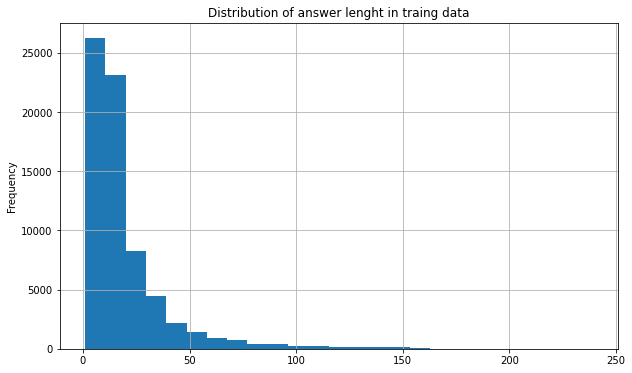

In [50]:
train_df['answers_text'].apply(len).plot.hist(title="Distribution of answer lenght in traing data", bins=25, figsize=figsize, grid=True)

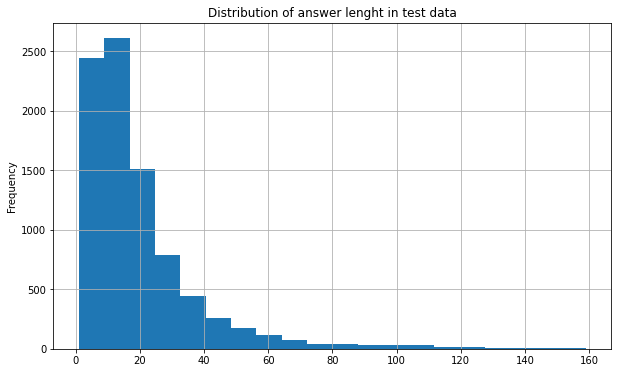

In [42]:
test_df['answers_text'].apply(len).plot.hist(title="Distribution of answer lenght in test data", bins=20, figsize=figsize, grid=True)

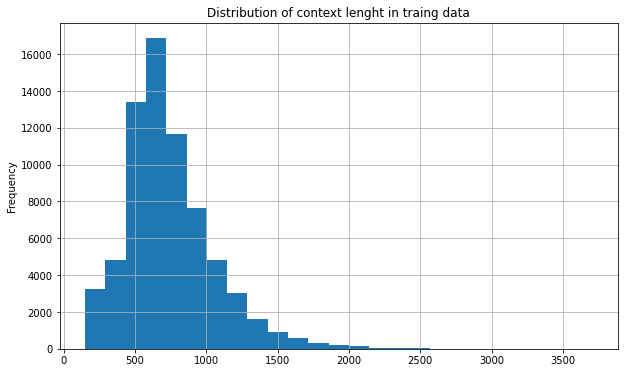

In [51]:
train_df['context'].apply(len).plot.hist(title="Distribution of context lenght in traing data", bins=25, figsize=figsize, grid=True)

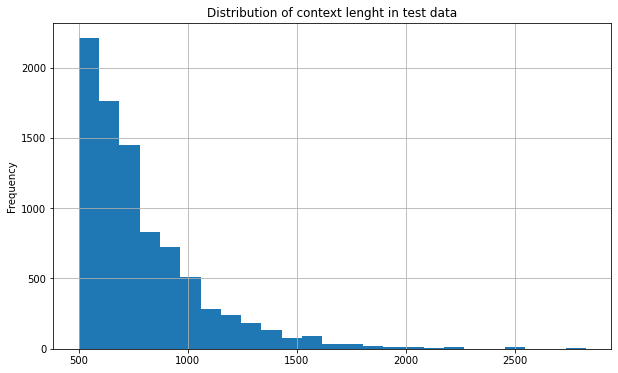

In [54]:
test_df['context'].apply(len).plot.hist(title="Distribution of context lenght in test data", bins=25, figsize=figsize, grid=True)

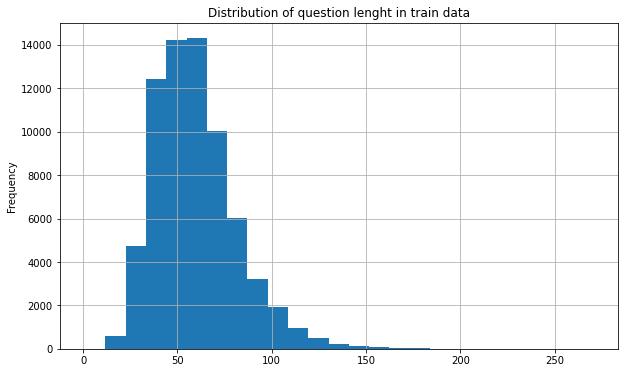

In [55]:
train_df['question'].apply(len).plot.hist(title="Distribution of question lenght in train data", bins=25, figsize=figsize, grid=True)

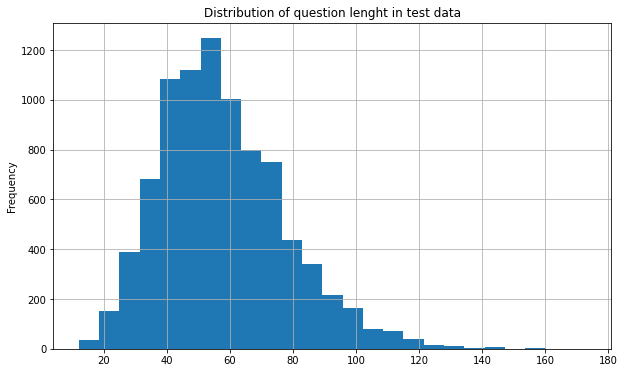

In [59]:
test_df['question'].apply(len).plot.hist(title="Distribution of question lenght in test data", bins=25, figsize=figsize, grid=True)

In [80]:
def find_question_type(df):
  len_df = len(df['question'])
  
  what = len(df[df['question'].str.contains('what', case=False, regex=False)]) 
  where = len(df[df['question'].str.contains('where', case=False, regex=False)]) 
  when = len(df[df['question'].str.contains('when', case=False, regex=False)]) 
  who = len(df[df['question'].str.contains('who', case=False, regex=False)]) 
  which = len(df[df['question'].str.contains('which', case=False, regex=False)]) 
  how = len(df[df['question'].str.contains('how', case=False, regex=False)])
  whom = len(df[df['question'].str.contains('whom', case=False, regex=False)])
  why = len(df[df['question'].str.contains('why', case=False, regex=False)])
  
  others = len_df - what - where - when - who - which - how - whom - why

  # In case of duplicates picked up by contains
  if others < 0:
    others = 0

  return what, where, when, who, which, how, whom, why, others

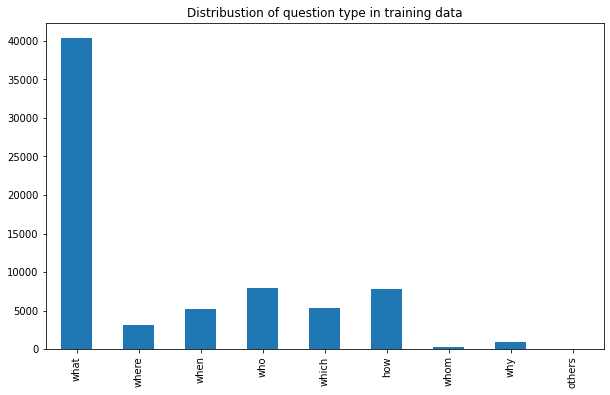

In [83]:
question_type = find_question_type(train_df)
plotdata = pd.DataFrame({"question": question_type}, index=["what", "where","when","who","which","how","whom", "why", "others"])
plotdata['question'].plot(kind="bar",title="Distribustion of question type in training data", figsize=figsize)

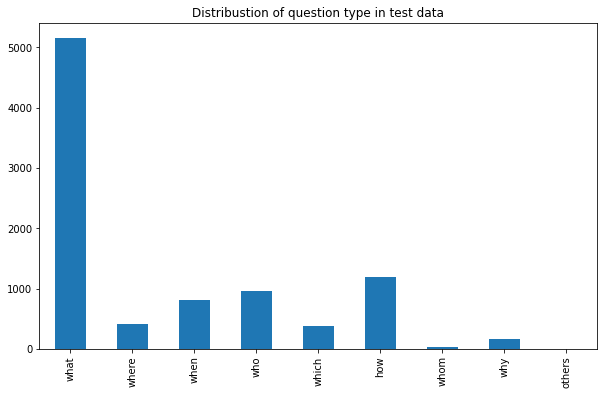

In [84]:
question_type = find_question_type(test_df)
plotdata = pd.DataFrame({"question": question_type}, index=["what", "where","when","who","which","how","whom", "why", "others"])
plotdata['question'].plot(kind="bar",title="Distribustion of question type in test data", figsize=figsize)

## Parameters

In [ ]:
batch_size = 2
learning_rate = 0.00001

## Preprocessing
